<a href="https://colab.research.google.com/github/farhanwadia/nlp_g14/blob/Geet/p3_TopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up notebook


In [3]:
# cloning our Project Repo
!git clone -b Geet https://github.com/farhanwadia/nlp_g14.git

Cloning into 'nlp_g14'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 6), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), 1.17 MiB | 8.10 MiB/s, done.


In [4]:
%cd nlp_g14/

/content/nlp_g14


In [5]:
! ls

MIE1624Project.ipynb	reddit_scraper.ipynb
p3_TopicModeling.ipynb	russia_ukraine_reddit_comments.csv
README.md


# Import Libraries


In [17]:
# importing basic python modules that we most probably will be using in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try: 
  import langdetect
except:
  !pip install langdetect
  import langdetect

# to make sure our plots are inline with the code cells
%matplotlib inline 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 35.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=662ba644d0b61137fa2cddbc7b7f1c3c8e7ab5bec3276e9a2c42406e96d0d107
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [7]:
reddit_data = 'russia_ukraine_reddit_comments.csv'
reddit_df = pd.read_csv(reddit_data)
reddit_df.head()

,Post - Author,Post - Date,Post - Is Distinguished,Post - Is Edited,Post - Is Original Content,Post - Is Locked,Post - Name,Post - num_comments,Post - over_18,Post - Permalink,...,Author,Date,Parent ID Prefix,Parent ID,Is Distinguished,Is Edited,Is Stickied,Permalink,Score,Body
0,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,iwsfutcmd,2023-03-15 19:15:22,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,75,Myanmar?\n\nwell that's a surprise
1,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,snowday784,2023-03-15 17:25:13,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,316,Bolivia what is you doing bby
2,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,micahsaurus,2023-03-15 15:32:45,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,202,"Kind of misleading.\n\nIt should read, “Which ..."
3,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,grisioco,2023-03-15 14:28:30,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,371,you know youre in the right when the only coun...
4,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,Foreign_Phone59,2023-03-15 22:18:48,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,50,Not Afganistan and Myanmar being beacons of re...


In [10]:
reddit_df['Date'].value_counts()

2022-03-03 09:57:35    2
2022-03-01 17:12:20    2
2023-02-20 19:49:39    2
2022-02-24 04:43:07    2
2022-03-01 17:45:34    2
                      ..
2023-02-24 15:57:55    1
2023-02-24 20:08:23    1
2023-02-24 18:33:48    1
2023-02-24 17:59:51    1
2023-02-21 17:36:10    1
Name: Date, Length: 7806, dtype: int64

In [21]:
red_text_df = reddit_df[['Body', 'Date']].copy(deep=True)

In [22]:
# Check nulls
red_text_df.isnull().sum(axis=0)

Body    0
Date    0
dtype: int64

In [23]:
# Drop Duplicates
print(red_text_df.info())
red_text_df.drop_duplicates(subset='Body', inplace=True)
red_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7852 entries, 0 to 7851
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    7852 non-null   object
 1   Date    7852 non-null   object
dtypes: object(2)
memory usage: 122.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7645 entries, 0 to 7851
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    7645 non-null   object
 1   Date    7645 non-null   object
dtypes: object(2)
memory usage: 179.2+ KB


In [24]:
# Filter to only have english

from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def detect_language(text):
  try:
    return detect(text)
  except:
    return None

red_text_df['language'] = red_text_df['Body'].apply(detect_language)
red_text_df.head()

,Body,Date,language
0,Myanmar?\n\nwell that's a surprise,2023-03-15 19:15:22,en
1,Bolivia what is you doing bby,2023-03-15 17:25:13,en
2,"Kind of misleading.\n\nIt should read, “Which ...",2023-03-15 15:32:45,en
3,you know youre in the right when the only coun...,2023-03-15 14:28:30,en
4,Not Afganistan and Myanmar being beacons of re...,2023-03-15 22:18:48,en


In [25]:
red_text_df['language'].value_counts()

en       7231
fr         60
de         37
af         27
id         24
cy         19
et         18
no         18
tl         17
nl         16
ca         14
so         13
tr         12
it         11
ru         10
da         10
es         10
ro          9
pt          7
sw          7
sv          7
fi          6
pl          5
lt          4
hr          4
sl          4
cs          4
sq          4
lv          3
bg          2
sk          1
zh-cn       1
mk          1
uk          1
vi          1
Name: language, dtype: int64

In [30]:
df_check = red_text_df[red_text_df['language'] != 'en']
df_check.head(40)

,Body,Date,language
14,[deleted],2023-03-15 17:57:42,da
20,Bummer w/ Vietnam,2023-03-15 22:07:38,de
26,Propaganda map.,2023-03-16 03:35:13,tl
29,Based Taliban,2023-03-16 06:27:42,id
34,Turkey.....,2023-03-15 16:41:39,tr
35,Chad Chad,2023-03-15 22:41:21,cy
40,Not 100%valid lmao,2023-03-16 04:11:17,et
49,Apoyo la intervención militar,2023-03-16 17:07:10,es
72,Oh sweet Summer child,2023-03-15 18:01:11,de
76,Gazwa Hind >>>,2023-03-16 16:59:48,sw


In [31]:
#red_text_df = red_text_df[red_text_df['language'] == 'en']
#red_text_df.info()

# Pre Processing

In [55]:
# importing required NLTK modules for text processsing
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from bs4 import BeautifulSoup
import re

def PreProcessor(text):
  lemmatizer = WordNetLemmatizer()
  stopword = stopwords.words('english')
  stopword.extend(['from', 'subject', 're', 'edu', 'use', 'russia', 'ukraine', 'war', 'russian']) ### Added some more stopwords
  text = BeautifulSoup(text, 'html.parser').get_text()
  text = re.sub(r'http\S+', '', text)
  text = re.sub(' +', ' ', text)
  tokens = nltk.word_tokenize(text)
  lower = [word.lower() for word in tokens]
  no_stopwords = [word for word in lower if word not in stopword]
  no_alpha = [word for word in no_stopwords if word.isalpha()]
  lemm_text = [lemmatizer.lemmatize(word) for word in no_alpha]
  normalized_text = lemm_text
  return normalized_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<ipython-input-55-2c38b017a278>:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
<ipython-input-55-2c38b017a278>:15: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


(-0.5, 399.5, 199.5, -0.5)

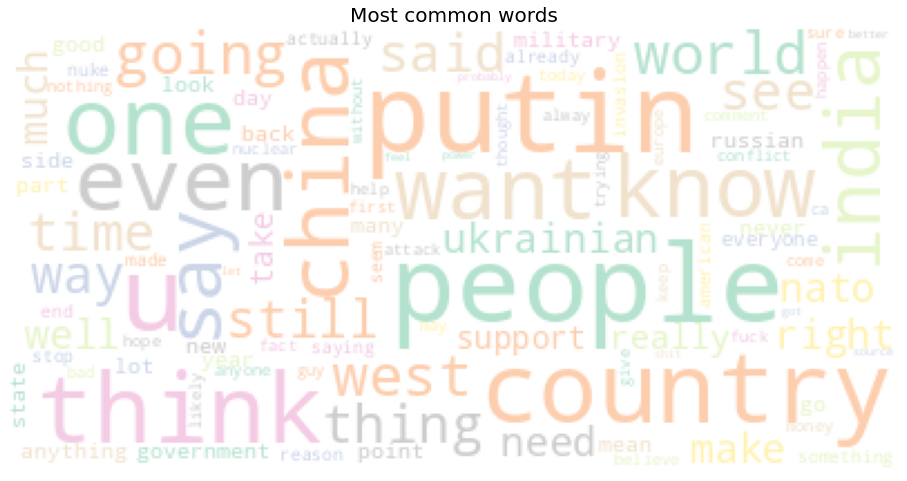

In [56]:
# let's checkput the word cloud of the tweets we have
from wordcloud import WordCloud
red_text_df['pre-processed'] = red_text_df['Body'].map(PreProcessor)
red_text_df['pre-processed text'] = red_text_df['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))
word_cloud = " ".join(red_text_df['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

In [57]:
## USE THE MODEL TO GET POSITIVE TEXT & NEGATIVE TEXT
split = int(red_text_df.shape[0]/2)
positive = red_text_df.iloc[:split,:]
negative = red_text_df.iloc[split:,:]

In [58]:
positive.head()

,Body,Date,language,pre-processed,pre-processed text
0,Myanmar?\n\nwell that's a surprise,2023-03-15 19:15:22,en,"[myanmar, well, surprise]",myanmar well surprise
1,Bolivia what is you doing bby,2023-03-15 17:25:13,en,"[bolivia, bby]",bolivia bby
2,"Kind of misleading.\n\nIt should read, “Which ...",2023-03-15 15:32:45,en,"[kind, misleading, read, country, voted, invas...",kind misleading read country voted invasion re...
3,you know youre in the right when the only coun...,2023-03-15 14:28:30,en,"[know, youre, right, country, supporting, nort...",know youre right country supporting north kore...
4,Not Afganistan and Myanmar being beacons of re...,2023-03-15 22:18:48,en,"[afganistan, myanmar, beacon, reason, asia]",afganistan myanmar beacon reason asia


In [59]:
positive_words = positive['pre-processed'].tolist()
negative_words = negative['pre-processed'].tolist()

LDA resource: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 


In [60]:

import gensim.corpora as corpora
# Create Dictionary
id2word_p = corpora.Dictionary(positive_words)
# Create Corpus
texts_p = positive_words
# Term Document Frequency
corpus_p = [id2word_p.doc2bow(text) for text in texts_p]

# Create Dictionary
id2word_n = corpora.Dictionary(negative_words)
# Create Corpus
texts_n = negative_words
# Term Document Frequency
corpus_n = [id2word_n.doc2bow(text) for text in texts_n]

In [61]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model_p = gensim.models.LdaMulticore(corpus=corpus_p,
                                       id2word=id2word_p,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_p.print_topics())
doc_lda = lda_model_p[corpus_p]

[(0,
  '0.012*"putin" + 0.011*"people" + 0.009*"would" + 0.008*"like" + '
  '0.008*"make" + 0.007*"u" + 0.005*"country" + 0.004*"one" + 0.004*"support" '
  '+ 0.004*"want"'),
 (1,
  '0.013*"putin" + 0.010*"people" + 0.007*"many" + 0.006*"like" + '
  '0.006*"french" + 0.006*"know" + 0.005*"country" + 0.005*"one" + '
  '0.004*"year" + 0.004*"make"'),
 (2,
  '0.007*"think" + 0.007*"putin" + 0.007*"world" + 0.006*"india" + 0.006*"one" '
  '+ 0.006*"want" + 0.006*"u" + 0.005*"get" + 0.005*"would" + 0.005*"people"'),
 (3,
  '0.010*"think" + 0.007*"u" + 0.007*"even" + 0.007*"people" + 0.006*"india" + '
  '0.006*"like" + 0.006*"would" + 0.006*"want" + 0.005*"say" + 0.004*"thing"'),
 (4,
  '0.009*"people" + 0.008*"like" + 0.007*"india" + 0.006*"one" + 0.006*"think" '
  '+ 0.005*"get" + 0.005*"country" + 0.005*"even" + 0.005*"time" + '
  '0.005*"right"'),
 (5,
  '0.008*"think" + 0.007*"country" + 0.006*"ukrainian" + 0.006*"go" + '
  '0.006*"putin" + 0.005*"people" + 0.005*"would" + 0.005*"russia

LDA #2 Resource: https://www.analyticsvidhya.com/blog/2021/07/topic-modelling-with-lda-a-hands-on-introduction/

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopword = stopwords.words('english')
stopword.extend(['from', 'subject', 're', 'edu', 'use', 'russia', 'ukraine', 'war', 'russian']) ### Added some more stopwords

vect =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_p =vect.fit_transform(positive['pre-processed text'])

In [66]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_p=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_p=lda_model_p.fit_transform(vect_text_p)

In [70]:
vocab = vect.get_feature_names_out()
for i, comp in enumerate(lda_model_p.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")
     print('\n')


Topic 0: 
yeah thanks lmao india oh stop ok soldier little life 

Topic 1: 
de send trump buying party money keep law jew stupid 

Topic 2: 
comment sound like le na gon video root zelensky mean 

Topic 3: 
people putin think would like country one ukrainian want even 

Topic 4: 
paranoia holiday yes true thought please christmas nazi belief say 

Topic 5: 
putin guy bot window pick ta sorry really civil got 

Topic 6: 
la number back leave orthodox point victory line machine want 

Topic 7: 
ask stalin idiot reading brain get dont referendum personal common 

Topic 8: 
kyiv special lol fascist right read support korea thing conscript 

Topic 9: 
fuck traitor good pa je ce troll desantis que qui 

